In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [3]:
#ucitavanje skupa
df = pd.read_csv("C:/Users/student/Desktop/ipVezbe122021/primeri/dogs.csv")

#prikaz imena kolona + 5 prvih instanci
print('Prvih 5 instanci')
print(df.head())


Prvih 5 instanci
              breed  height  weight
0     Border Collie      19      45
1    Boston Terrier      12      20
2  Brittany Spaniel      18      35
3       Bullmastiff      29     120
4         Chihuahua       8       8


In [4]:
# Za klasterovanje ce se koristiti atributi visina i tezina psa,
# a rasa nece biti uzeta u obzir.
features = df.columns[1:]

#vrednost atributa breed (tj. rasa) postaje oznaka (indeks) instance
df.set_index('breed', inplace=True)


In [5]:
#normalizacija vrednosti atributa
scaler = MinMaxScaler().fit(df)
x = pd.DataFrame(scaler.transform(df), columns=features, index=df.index)


"""
Density-Based Spatial Clustering of Applications with Noise

parametri:

eps : maksimalna udaljenost za instance-komsije
      default:0.5
min_samples : broj suseda koje mora da ima instanca u jezgru
      default:5
metric : metrika za racunanje rastojanja
      default:'euclidean'

atributi:
core_sample_indices_ : indeksi instanci u jezgru
labels_ : oznake klastera za svaku instancu. Instance koje se smatraju sumom imaju
oznaku -1
"""

In [6]:
# Definisanje boja koje se koriste pri crtanju instanci klastera.
# Instance jednog klastera ce biti prikazane istom bojom.
# Sum ce biti prikazan crvenom bojom.
colors = ['darkcyan', 'magenta', 'gold', 'blue', 'navy', 'green', 'red']


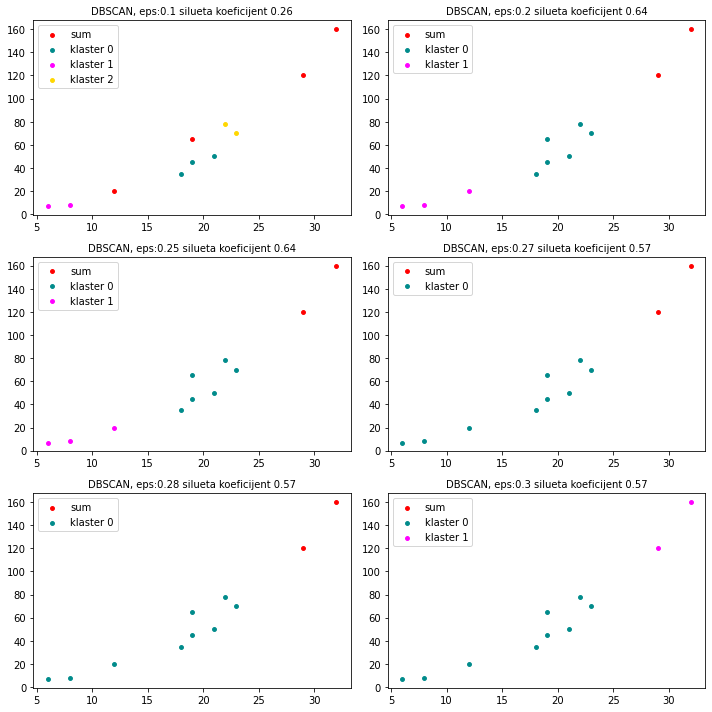

In [16]:
# pravljenje slike sa graficima
fig = plt.figure(figsize=(10,10))

#oznaka celije na slici u kojoj se vrse naredna crtanja
plt_ind=1
#Primena algoritma dbscan sa razlicitim vrednostima za parametar eps, a  parametar za
# broj suseda koje mora da ima instanca u jezgru je 2.
for eps in [0.1, 0.2, 0.25, 0.27, 0.28, 0.3]:

    est=DBSCAN(eps=eps, min_samples=2)
    est.fit(x)

    # Originalnom skupu se dodaje jos jedan atribut 'label', koji sadrzi
    # podatak kom klasteru pripada koja instanca.
    # Oznake klastera su u intervalu [0, n_clusters-1]
    # Instance tipa sum imaju oznaku -1.
    df['label']= est.labels_

    num_clusters=max(est.labels_)+1

    # Podela slike na 3x2 celije i zadavanje
    # celije (plt_ind) u kojoj ce se izvrsiti naredna crtanja.
    fig.add_subplot(3,2,plt_ind)

    #obrada svakog klastera
    for j in range(-1,num_clusters):

        # izdvajanje instanci klastera koji se obradjuje
        cluster= df.loc[df['label'] == j, :]

        # dodela oznake klasteru za legendu
        if j==-1:
            label='sum'
        else:
            label = "klaster {0}".format(j)

        # crtanje instanci klastera pomocu seme sa rasprsenim elementima
        plt.scatter(cluster['height'], cluster['weight'], color=colors[j], s=15, marker='o', label=label)

    # postavljanje legende i naslova (koji sadrzi vrednost parametra eps i silueta koeficijent)
    # za svaku celiju
    plt.legend()
    plt.title('DBSCAN, eps:{0:0.2} silueta koeficijent {1:0.2}'.format(eps, silhouette_score(x, df['label'])), fontsize=10)

    # Prelazak u narednu celiju u kojoj ce se prikazati
    # rezultat klasterovanja sa novim parametrima.
    plt_ind+=1

# prikaz slike bez poklapanja celija
plt.tight_layout()

